# Lab 04: Test Set Evaluation - Exercise

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully!

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data/cifar"

train_data = torch.load(data_path + "/train_data.pt")
train_label = torch.load(data_path + "/train_label.pt")
test_data = torch.load(data_path + "/test_data.pt")
test_label = torch.load(data_path + "/test_label.pt")

In [3]:
train_data.shape, train_label.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

In [4]:
test_data.shape, test_label.shape

(torch.Size([10000, 3, 32, 32]), torch.Size([10000]))

### Make a ONE layer net class

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [12]:
net = one_layer_net(3072, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [13]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

bs = 200

### Do a 50 passes through the training set

In [14]:
for epoch in range(50):
    
    running_loss = 0.0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(50000)
    
    for i in range(0, 50000, bs):
        optimizer.zero_grad()
        
        indices = shuffled_indices[i : i+bs]
        minibatch_data = train_data[indices]
        minibatch_labels = train_label[indices]
        
        inputs = minibatch_data.view(bs, -1)
        inputs.requires_grad_()
        
        scores = net(inputs)
        loss = criterion(scores, minibatch_labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_labels)
        running_error += error.item()
        num_batches += 1
        
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    print("Epoch: {}, Loss: {}, Error: {}%".format(
        epoch, total_loss, total_error*100))

Epoch: 0, Loss: 1.9273717885017394, Error: 68.09599983692169%
Epoch: 1, Loss: 1.8220949158668518, Error: 63.59399967193603%
Epoch: 2, Loss: 1.78948503780365, Error: 62.27200021743774%
Epoch: 3, Loss: 1.7878308882713319, Error: 62.1360000371933%
Epoch: 4, Loss: 1.7681951627731323, Error: 61.31800012588501%
Epoch: 5, Loss: 1.7596465458869934, Error: 60.892000293731684%
Epoch: 6, Loss: 1.747454520702362, Error: 60.266000390052795%
Epoch: 7, Loss: 1.7441258454322814, Error: 60.57000033855439%
Epoch: 8, Loss: 1.7437040858268738, Error: 60.30200035572052%
Epoch: 9, Loss: 1.7339965305328369, Error: 59.82800049781799%
Epoch: 10, Loss: 1.727798146724701, Error: 59.620000457763666%
Epoch: 11, Loss: 1.729230486869812, Error: 59.64600040912627%
Epoch: 12, Loss: 1.726452663898468, Error: 59.2820004940033%
Epoch: 13, Loss: 1.7229637041091919, Error: 59.41000065803528%
Epoch: 14, Loss: 1.7179340314865112, Error: 59.1700003862381%
Epoch: 15, Loss: 1.7168496446609498, Error: 59.00600020885467%
Epoch: 1

## You only have to complete this cell

### So we are doing around 58% error on the training set, how much are we doing on test set?

In [15]:
running_error = 0
num_batches = 0

for i in range(0, test_data.shape[0], bs):
    
    minibatch_data = test_data[i : i+bs]
    minibatch_labels = test_label[i : i+bs]
    
    inputs = minibatch_data.view(bs, -1)
    
    scores = net(inputs)
    
    error = utils.get_error(scores, minibatch_labels)
    
    running_error += error.item()
    num_batches += 1

total_error = running_error / num_batches
print("Error rate on test set: {}%".format(total_error*100))

Error rate on test set: 62.139999866485596%


### Choose image at random from the test set and see how good/bad are the predictions

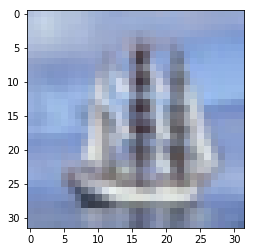

In [16]:
idx = randint(1, 10000-1)
im = test_data[idx]
utils.show(im)

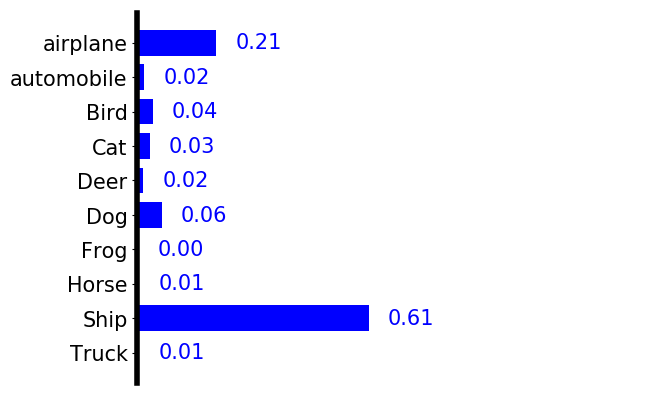

In [17]:
scores = net(im.view(1, -1))
probs = F.softmax(scores, dim=1)
utils.show_prob_cifar(probs)

In [18]:
test_label[idx]

tensor(8)